# Customer Churn Production

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
churn_data= pd.read_csv("churn_prediction.csv")
churn_data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [3]:
churn_data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
#To check the null value of the dataset
churn_data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [6]:
#To check the unique value of the each variable
churn_data.nunique()

customer_id                       22067
vintage                            5311
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1388
customer_nw_category                  3
branch_code                        2888
days_since_last_transaction         357
current_balance                   21787
previous_month_end_balance        21808
average_monthly_balance_prevQ     21725
average_monthly_balance_prevQ2    21818
current_month_credit               9561
previous_month_credit              9841
current_month_debit               12218
previous_month_debit              12476
current_month_balance             21826
previous_month_balance            21799
churn                                 2
dtype: int64

In [7]:
churn_data.shape

(22067, 21)

In [8]:
churn_data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [9]:
#since the thier is noo any significant relation between the costumer id and churn data
churn_data.drop('customer_id',axis = 1,inplace = True)

In [10]:
#Checking the dataset distribution
churn_data['churn'].value_counts()/len(churn_data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

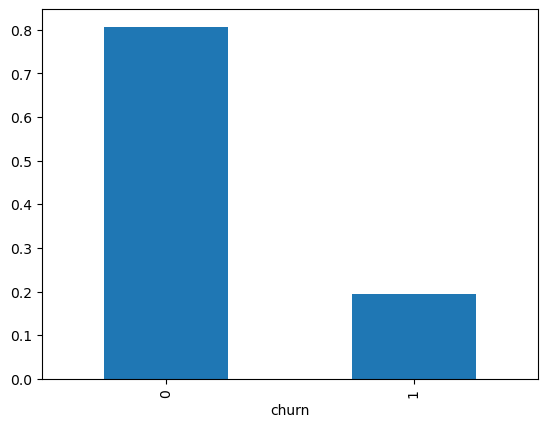

In [11]:
churn_data['churn'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [12]:
churn_data.groupby(['churn']).mean(numeric_only=True)

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
churn,,,,,,,,,,,,,,,,,,,
0,2597.512393,48.173327,0.396729,0.362839,0.790030,800.877705,2.208959,859.321419,69.262856,7615.216183,7057.417491,6905.535626,6399.836906,2996.164510,3110.363432,2714.909940,2802.150847,7271.478358,6830.740356
1,2337.070894,46.923959,0.371315,0.438465,0.699111,797.990875,2.224614,937.384885,57.242864,5123.372894,7907.235005,8332.823154,7923.614312,7885.085384,6574.800997,9714.264134,7542.797237,6723.879291,8645.085047


In [13]:
churn_data.groupby('gender')['churn'].mean()

gender
0    0.200209
1    0.183553
Name: churn, dtype: float64

In [14]:
#categorical variables labeled as float
churn_data.nunique().sort_values()

churn                                 2
gender                                2
customer_nw_category                  3
occupation                            5
dependents                           15
age                                  90
days_since_last_transaction         357
city                               1388
branch_code                        2888
vintage                            5311
current_month_credit               9561
previous_month_credit              9841
current_month_debit               12218
previous_month_debit              12476
average_monthly_balance_prevQ     21725
current_balance                   21787
previous_month_balance            21799
previous_month_end_balance        21808
average_monthly_balance_prevQ2    21818
current_month_balance             21826
dtype: int64

In [15]:
#Creating the subset of the categorical variables which are labeled as float
col_int = churn_data.nunique().reset_index()
col_int.columns = ['features','object']
col_int['object'] = col_int['object'].astype('int64')
col_int = col_int.sort_values(by ='object')
col_int = col_int[col_int.object<10]
col_int.features.values

array(['churn', 'gender', 'customer_nw_category', 'occupation'],
      dtype=object)

In [16]:
df_ = churn_data[col_int.features.values]
df_

,churn,gender,customer_nw_category,occupation
0,0,0,2,0
1,1,0,3,0
2,0,1,2,0
3,0,0,1,1
4,0,0,2,0
...,...,...,...,...
22062,0,0,2,0
22063,0,1,2,3
22064,0,1,2,0
22065,1,0,2,2


<Axes: xlabel='gender', ylabel='count'>

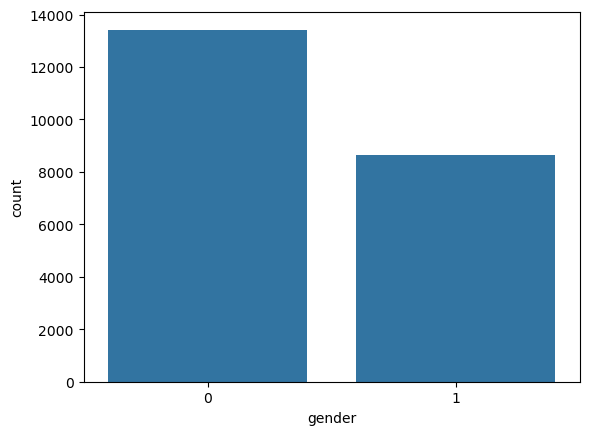

In [17]:
#To analyse the data wrt to gneder
import seaborn as sns
sns.countplot(x='gender', data=churn_data)

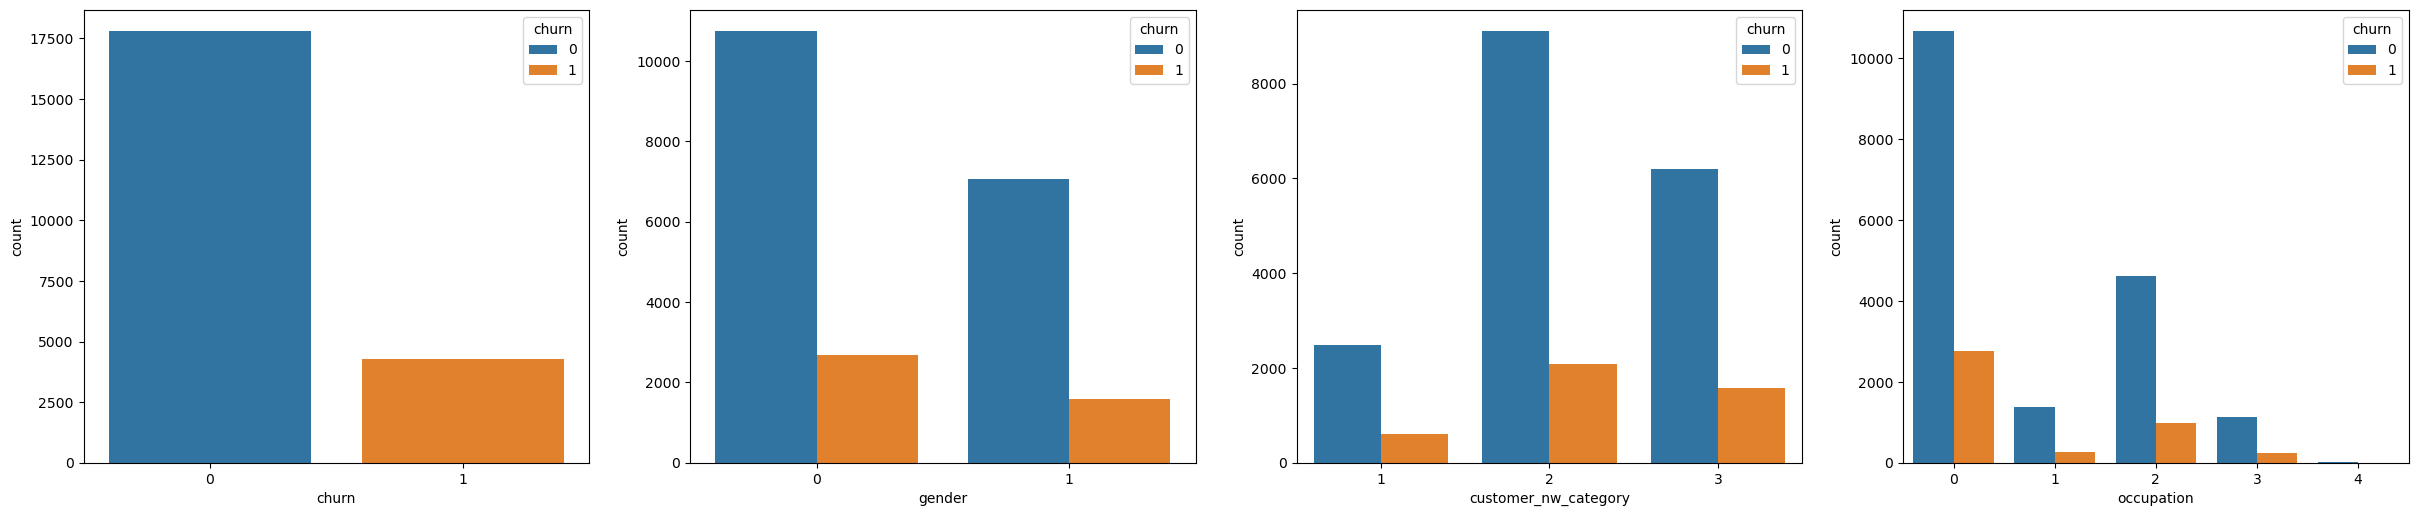

In [18]:
plt.figure(figsize=(30,20))
for i in enumerate(df_.columns):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(x = i[1],hue = 'churn',data =df_)

# For the continuous variable

In [19]:
df_cont = churn_data.select_dtypes(include=['float'])
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dependents                      22067 non-null  float64
 1   city                            22067 non-null  float64
 2   days_since_last_transaction     22067 non-null  float64
 3   current_balance                 22067 non-null  float64
 4   previous_month_end_balance      22067 non-null  float64
 5   average_monthly_balance_prevQ   22067 non-null  float64
 6   average_monthly_balance_prevQ2  22067 non-null  float64
 7   current_month_credit            22067 non-null  float64
 8   previous_month_credit           22067 non-null  float64
 9   current_month_debit             22067 non-null  float64
 10  previous_month_debit            22067 non-null  float64
 11  current_month_balance           22067 non-null  float64
 12  previous_month_balance          

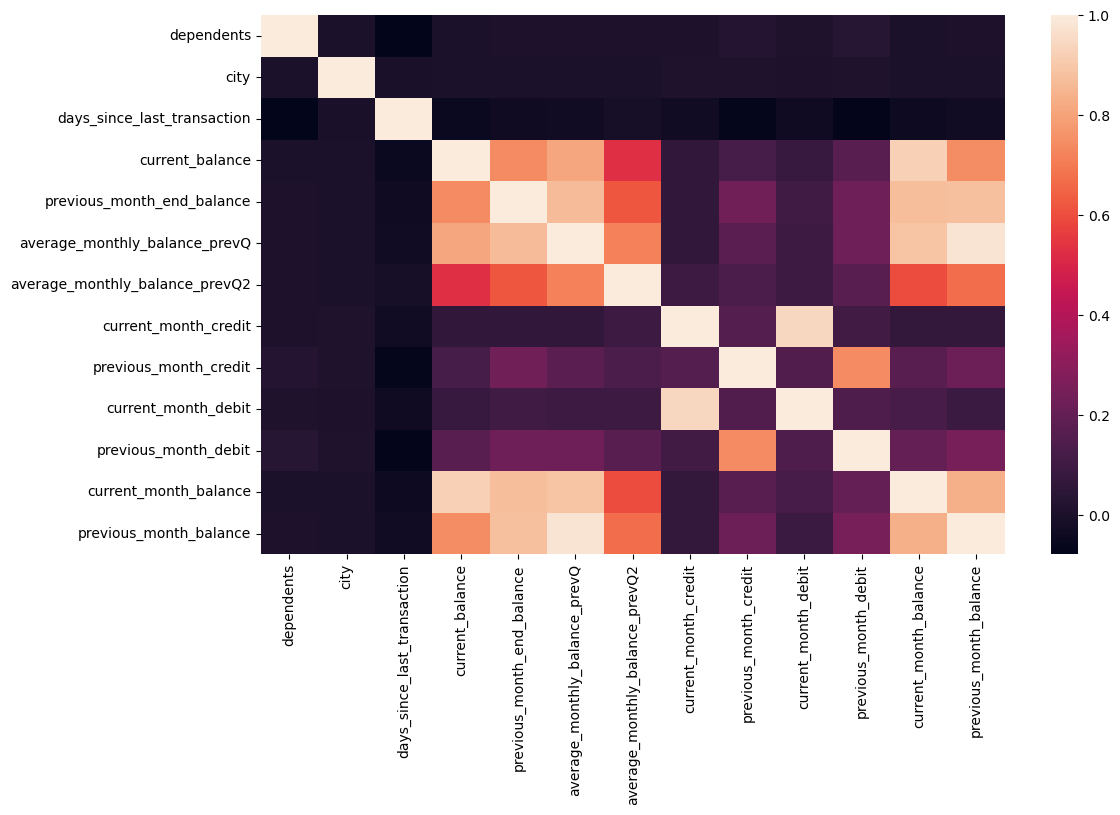

In [20]:
plt.figure(figsize = (12,7))
sns.heatmap(df_cont.corr())
plt.show()

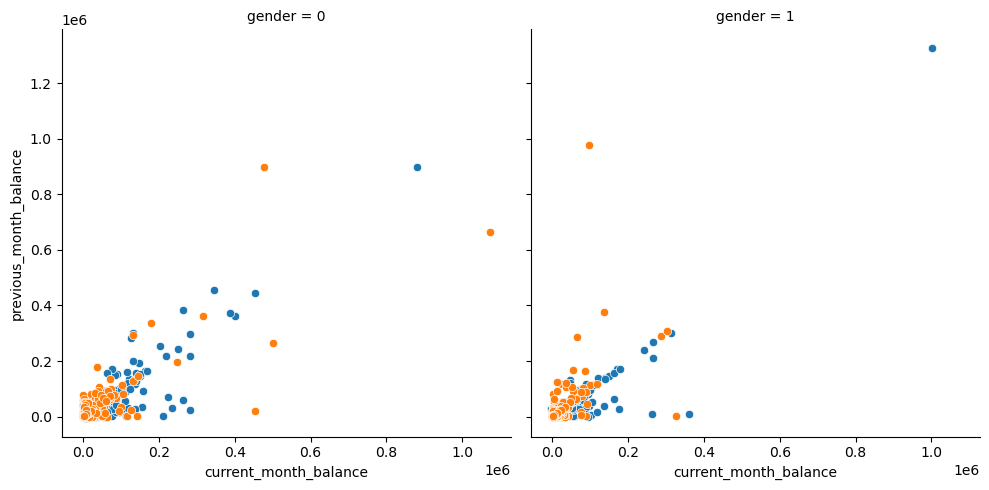

In [21]:
g = sns.FacetGrid(churn_data,hue = 'churn',col='gender',height = 5)
g.map(sns.scatterplot,'current_month_balance','previous_month_balance')
plt.show()

# Resampling of the dataset

In [22]:
from sklearn.utils import resample
#Seperate majority and minority classes
df_majority = churn_data[churn_data['churn'] == 0]
df_minority = churn_data[churn_data['churn'] == 1]
#Unsample minority classes
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = len(df_majority),
                                random_state = 42)
# Combine majority class with upsamples minority class
df_balanced = pd.concat([df_majority,df_minority_upsampled])

In [23]:
df_balanced['churn'].value_counts()

churn
0    17793
1    17793
Name: count, dtype: int64

In [24]:
#seperating the dependent and independent variables
X=churn_data.drop(columns=['churn'])
Y=churn_data['churn']

In [25]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_x=scaler.fit_transform(X)

In [26]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

For Training dataset

In [27]:

results_train = {
    'Model Name': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

For Testing dataset

In [28]:
results_test = {
    'Model Name': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
}

In [29]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
def Train_evaluation_metrics(Model_name,accuracy,precision,recall,f1):
    results_train['Model Name'].append(Model_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)

In [30]:
def Test_evaluation_metrics(Model_name,accuracy,precision,recall,f1):
    results_test['Model Name'].append(Model_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Model building , predictions and odds ratio

In [31]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight= 'balanced')

In [32]:
classifier.fit(x_train,y_train)
pred_train_values=classifier.predict(x_train)
pred_test_values=classifier.predict(x_test)
predicted_probabilities= classifier.predict_proba(x_test)

In [33]:
pred_test_values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.68365482, 0.31634518],
        [0.49758382, 0.50241618],
        [0.55648989, 0.44351011],
        ...,
        [0.62890945, 0.37109055],
        [0.54168513, 0.45831487],
        [0.61421087, 0.38578913]]),
 (4414, 2))

In [35]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test,pred_test_values)
cf

array([[2775,  772],
       [ 322,  545]], dtype=int64)

In [36]:
#Accuracy
accuracy = classifier.score(x_test,y_test)
accuracy

0.7521522428636158

In [37]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision= precision_score(y_test, pred_test_values)
Precision

0.4138192862566439

In [38]:
#Calculating the recall score
from sklearn.metrics import recall_score
Recall= recall_score(y_test, pred_test_values)
Recall

0.6286043829296425

In [39]:
#manually calculating the  f1 score 
f1=2/((1/Precision)+(1/Recall))
f1

0.4990842490842491

In [40]:
#Calculating the f1-score
from sklearn.metrics import f1_score
F1=  f1_score(y_test, pred_test_values)
F1

0.4990842490842491

In [41]:
#calculating precision,recall ,f1-score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, pred_test_values)

In [42]:
#First value representing the matrics values wrt to class 0 and second would be class 1
precision

array([0.89602841, 0.41381929])

In [43]:
recall

array([0.78235128, 0.62860438])

In [44]:
f1

array([0.83534016, 0.49908425])

In [45]:
from sklearn.metrics import classification_report
k= classification_report(y_test, pred_test_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3547
           1       0.41      0.63      0.50       867

    accuracy                           0.75      4414
   macro avg       0.65      0.71      0.67      4414
weighted avg       0.80      0.75      0.77      4414



In [46]:
accuracy = accuracy_score(y_train, pred_train_values)
precision = precision_score(y_train, pred_train_values)
recall = recall_score(y_train,pred_train_values)
f1 = f1_score(y_train, pred_train_values)

In [47]:
Train_evaluation_metrics("LogisticRegression",accuracy,precision,recall,f1)

In [48]:
accuracy = accuracy_score(y_test, pred_test_values)
precision = precision_score(y_test, pred_test_values)
recall = recall_score(y_test,pred_test_values)
f1 = f1_score(y_test, pred_test_values)

In [49]:
Test_evaluation_metrics("LogisticRegression",accuracy,precision,recall,f1)

# Precision-Recall Curve

In [50]:
#Gathering precision/ recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points =precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

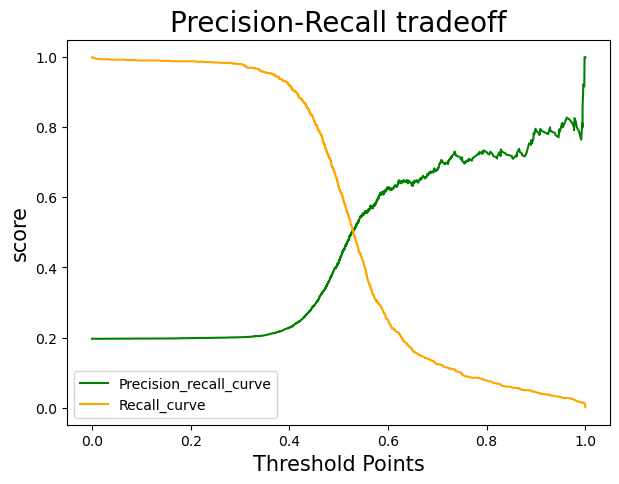

In [51]:
plt.figure(figsize= (7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color ='green', label='Precision_recall_curve')
plt.plot(threshold_points, recall_points[:-1], color='orange',label='Recall_curve')
plt.xlabel('Threshold Points', fontsize=15)
plt.ylabel('score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize= 20)
plt.legend()

# AUC ROC curve

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold =roc_curve(y_test, predicted_probabilities[:,1])

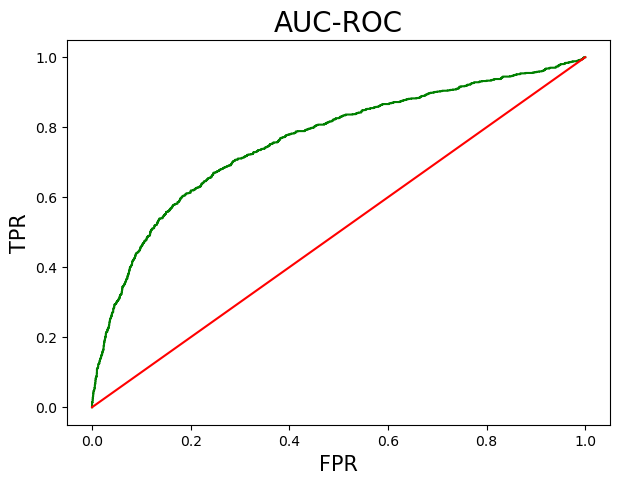

0.7610967437108346

In [53]:
plt.figure(figsize= (7,5), dpi=100)
plt.plot(fpr, tpr, color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize = 15)
plt.ylabel('TPR',fontsize = 15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Coefficient Plot

In [54]:
# Arranging the data
c=classifier.coef_.reshape(-1)
x= X.columns
coeff_plot= pd.DataFrame({
         'coefficients':c,
         'variable':x
     })
#sorting the values 
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
8,-0.001261,days_since_last_transaction
9,-0.000106,current_balance
0,-0.000083,vintage
1,-0.000058,age
10,-0.000011,previous_month_end_balance


Text(0.5, 1.0, 'coefficient plot')

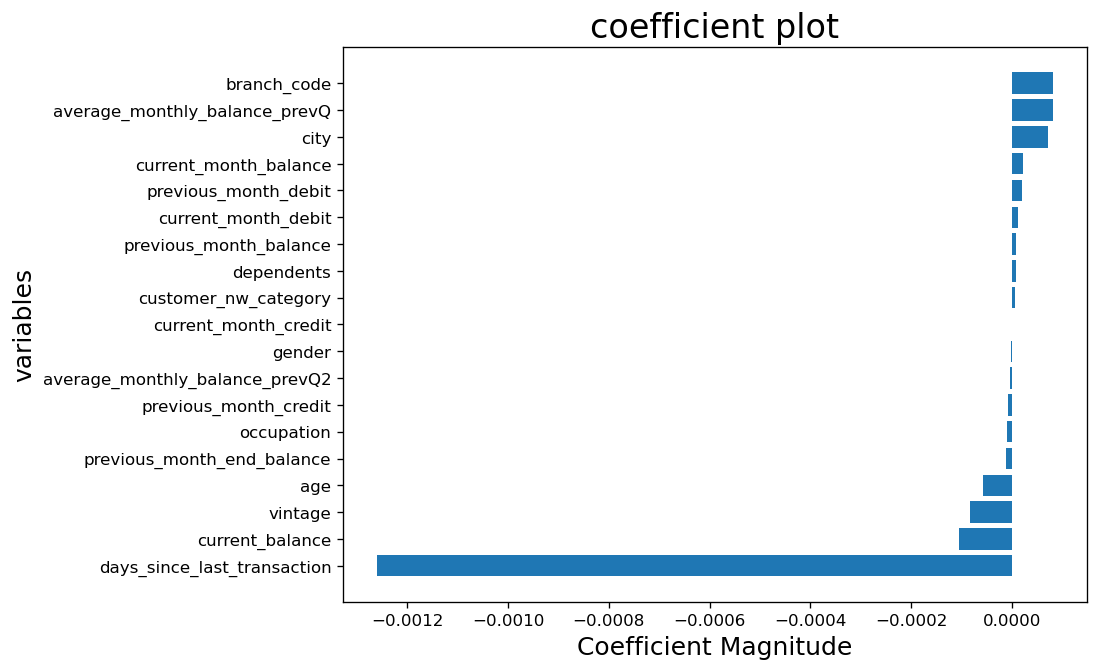

In [55]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel('Coefficient Magnitude',fontsize = 15)
plt.ylabel('variables', fontsize=15)
plt.title('coefficient plot', fontsize=20)

# Using Decision tree classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight= 'balanced')
classifier=DTC()

In [57]:
classifier.fit(x_train,y_train)
pred_train_values = classifier.predict(x_train)
pred_test_values = classifier.predict(x_test)

In [58]:
pred_test_values[:30]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

# Evaluation metrics

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14246
           1       1.00      1.00      1.00      3407

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [60]:
predicted_values= classifier.predict(x_test)
print(classification_report(y_test,pred_test_values))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3547
           1       0.42      0.43      0.43       867

    accuracy                           0.77      4414
   macro avg       0.64      0.64      0.64      4414
weighted avg       0.77      0.77      0.77      4414



In [61]:
! pip install graphviz

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file='tree_viz',
               max_depth=None, impurity = False)


# Improving model performance by hypertuning

In [63]:
classifier= DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

# Max Depth

In [64]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    predict=model.predict(x2)
    f2=f1_score(y2,predict)
    return f1,f2

In [65]:
def effect(train_score, test_score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis, test_score,color='blue',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel("Parameter value")
    plt.ylabel("f1 score")
    plt.show()

In [66]:
max_depth = [ i for i in range(1,50)]
train=[]
test=[]
for i in max_depth:
    model= DTC(class_weight='balanced',max_depth=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

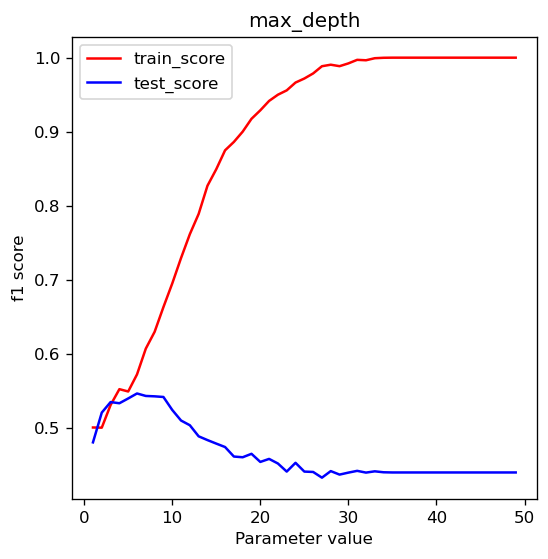

In [67]:
effect(train,test,range(1,50),'max_depth')

# Min-samples_split

In [68]:
min_samples= [i for i in range(2,5000,25)]
train=[]
test=[]
for i in min_samples:
    model= DTC(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

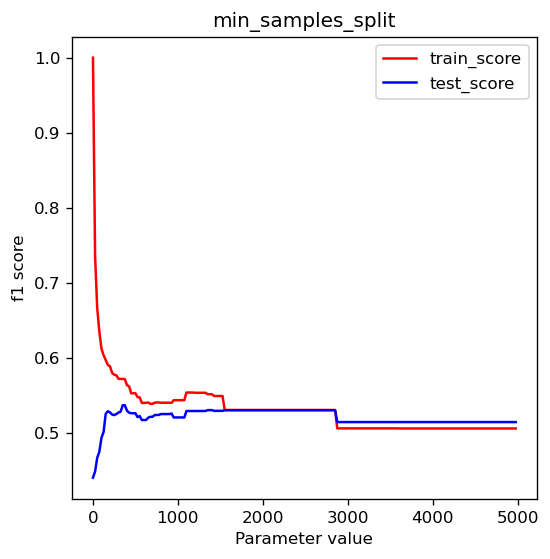

In [69]:
effect(train,test,range(2,5000,25),'min_samples_split')

# Max_Leaf_Node

In [70]:
maxleafnodes=[i for i in range(2,200,10)]
train=[]
test=[]
for i in maxleafnodes:
    model= DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
    f1,f2= calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

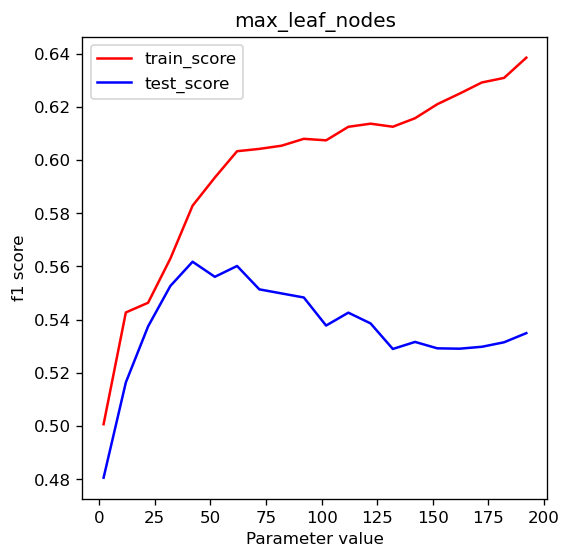

In [71]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

# Min_sample_leaf

In [72]:
min_samples_leaf=[i for i in range(2,4000,25)]
train=[]
test=[]
for i in min_samples_leaf:
    model=DTC(class_weight='balanced',min_samples_leaf=i, random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

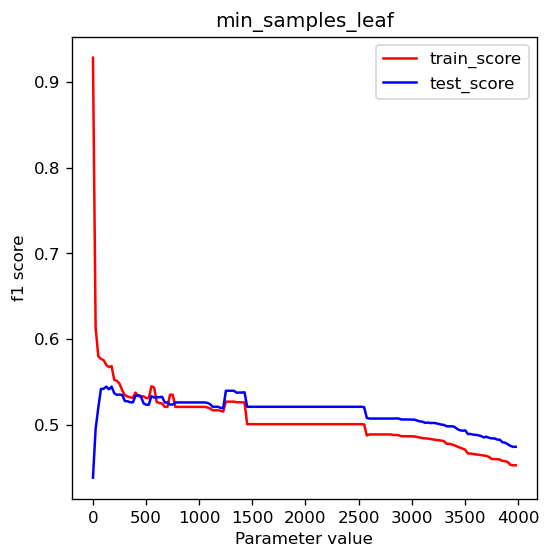

In [73]:
effect(train,test,range(2,4000,25),'min_samples_leaf')

In [74]:
tree=DTC(max_depth=6, max_leaf_nodes=25,min_samples_leaf=350, min_samples_split=1750)
tree.fit(x_train,y_train)
predicted_values = tree.predict(x_train)
feature_imp=pd.Series(tree.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

In [75]:
from sklearn.metrics import classification_report
pred_train_values = tree.predict(x_train)
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     14246
           1       0.62      0.41      0.49      3407

    accuracy                           0.84     17653
   macro avg       0.74      0.68      0.70     17653
weighted avg       0.82      0.84      0.82     17653



In [76]:
accuracy = accuracy_score(y_train, pred_train_values)
precision = precision_score(y_train, pred_train_values)
recall = recall_score(y_train,pred_train_values)
f1 = f1_score(y_train, pred_train_values)

In [77]:
Train_evaluation_metrics("DecsionTreeClassifer",accuracy,precision,recall,f1)

In [78]:
pred_test_values= tree.predict(x_test)
print(classification_report(y_test,pred_test_values))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3547
           1       0.59      0.39      0.47       867

    accuracy                           0.83      4414
   macro avg       0.72      0.66      0.68      4414
weighted avg       0.81      0.83      0.81      4414



In [79]:
accuracy = accuracy_score(y_test, pred_test_values)
precision = precision_score(y_test, pred_test_values)
recall = recall_score(y_test,pred_test_values)
f1 = f1_score(y_test, pred_test_values)

In [80]:
Test_evaluation_metrics("DecsionTreeClassifer",accuracy,precision,recall,f1)

Text(0.5, 1.0, 'feature importance')

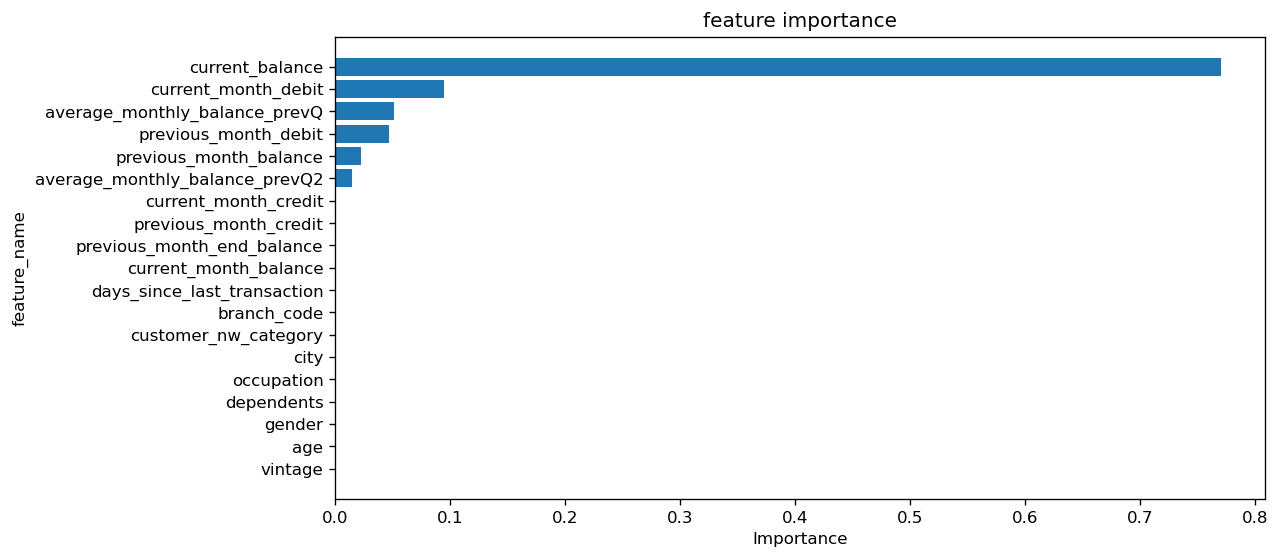

In [81]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel("Importance")
plt.ylabel("feature_name")
plt.title("feature importance")

In [82]:
! pip install -U scikit-learn

# Model building , Bagging logistic Regression

In [83]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [84]:
from sklearn.linear_model import LogisticRegression as LR
classifier = BC(LR(),
              n_estimators=150,
              n_jobs=-1,
              random_state=42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14246
           1       0.74      0.09      0.16      3407

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.53     17653
weighted avg       0.80      0.82      0.76     17653



In [86]:
accuracy = accuracy_score(y_train, predicted_values)
precision = precision_score(y_train, predicted_values)
recall = recall_score(y_train,predicted_values)
f1 = f1_score(y_train, predicted_values)

In [87]:
Train_evaluation_metrics("BaggingLogisticClassifier",accuracy,precision,recall,f1)

In [88]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3547
           1       0.74      0.12      0.21       867

    accuracy                           0.82      4414
   macro avg       0.78      0.55      0.55      4414
weighted avg       0.81      0.82      0.76      4414



In [89]:
accuracy = accuracy_score(y_test, predicted_values)
precision = precision_score(y_test, predicted_values)
recall = recall_score(y_test,predicted_values)
f1 = f1_score(y_test, predicted_values)

In [90]:
Test_evaluation_metrics("BaggingLogisticClassifer",accuracy,precision,recall,f1)

# Using Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [92]:
predicted_values=classifier.predict(x_train)
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14246
           1       1.00      1.00      1.00      3407

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [93]:
accuracy = accuracy_score(y_train, predicted_values)
precision = precision_score(y_train, predicted_values)
recall = recall_score(y_train,predicted_values)
f1 = f1_score(y_train, predicted_values)

In [94]:
Train_evaluation_metrics("RandomForestClassifier",accuracy,precision,recall,f1)

In [95]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3547
           1       0.71      0.42      0.52       867

    accuracy                           0.85      4414
   macro avg       0.79      0.69      0.72      4414
weighted avg       0.84      0.85      0.84      4414



In [96]:
accuracy = accuracy_score(y_test, predicted_values)
precision = precision_score(y_test, predicted_values)
recall = recall_score(y_test,predicted_values)
f1 = f1_score(y_test, predicted_values)

In [97]:
Test_evaluation_metrics("RandomForestClassifer",accuracy,precision,recall,f1)

In [98]:
df_train = pd.DataFrame(results_train)
df_train

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.752903,0.405688,0.602876,0.485006
1,DecsionTreeClassifer,0.837195,0.617453,0.411212,0.493658
2,BaggingLogisticClassifier,0.818444,0.735981,0.092457,0.164276
3,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000


In [99]:
df_test = pd.DataFrame(results_test)
df_test

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.752152,0.413819,0.628604,0.499084
1,DecsionTreeClassifer,0.826008,0.585198,0.392157,0.469613
2,BaggingLogisticClassifer,0.818985,0.742857,0.119954,0.206554
3,RandomForestClassifer,0.851835,0.710059,0.415225,0.524017


In [100]:
import pickle
pickle.dump(classifier,open("Churn Model/classifier.pkl",'wb'))
pickle.dump(scaler,open("Churn Model/scaler.pkl",'wb'))

In [103]:
churn_data.shape

(22067, 20)

In [105]:
churn_data['customer_nw_category']

0        2
1        3
2        2
3        1
4        2
        ..
22062    2
22063    2
22064    2
22065    2
22066    2
Name: customer_nw_category, Length: 22067, dtype: int64

In [123]:
churn_data['current_month_balance'].nunique()

21826

In [140]:
import numpy as np

def predict(model, scaler, vintage, age, gender, dependents, occupation,city, customer_nw_category, branch_code,
       days_since_last_transaction, current_balance,previous_month_end_balance, average_monthly_balance_prevQ,
       average_monthly_balance_prevQ2, current_month_credit,previous_month_credit, current_month_debit, previous_month_debit,
            current_month_balance, previous_month_balance):
    if gender=='male':
        gender_encoded =1
    else: 
        gender_encoded =0
   
    if customer_nw_category =='low':
        customer_nw_category_encoded = 1
    elif(customer_nw_category =='middle'):
        customer_nw_category_encoded = 2
    else:
        customer_nw_category_encoded = 3

    if occupation =='Self-Employed':
        occupation_encoded =1
    elif(occupation == 'Salaried'):
        occupation_encoded =2
    elif(occupation =='Student'):
        occupation_encoded =3
    elif(occupation == 'Unemployed'):
        occupation_encoded =4
    else:
        occupation_encoded =5
       
    features = np.array([[vintage, age, gender_encoded, dependents, occupation_encoded,
       city, customer_nw_category_encoded, branch_code,
       days_since_last_transaction, current_balance,
       previous_month_end_balance, average_monthly_balance_prevQ,
       average_monthly_balance_prevQ2, current_month_credit,
       previous_month_credit, current_month_debit, previous_month_debit,current_month_balance, previous_month_balance]])
    
    scaled_features = scaler.transform(features)
    
    result = model.predict(scaled_features)
    
    return result[0]

In [144]:
# test 1:
vintage= 100
age=21
gender='male'
dependents=10
occupation='Student'
city= 122
customer_nw_category = 'middle'
branch_code=1000
days_since_last_transaction = 300
current_balance =10000
previous_month_end_balance= 12000 
average_monthly_balance_prevQ = 13000
average_monthly_balance_prevQ2 = 2300
current_month_credit=1200
previous_month_credit=1000
current_month_debit=10000
previous_month_debit=12000
current_month_balance=15000
previous_month_balance=13000

churn = predict(model, scaler, vintage, age, gender, dependents, occupation,
       city, customer_nw_category, branch_code,
       days_since_last_transaction, current_balance,
       previous_month_end_balance, average_monthly_balance_prevQ,
       average_monthly_balance_prevQ2, current_month_credit,
       previous_month_credit, current_month_debit, previous_month_debit,current_month_balance, previous_month_balance)

if churn == 1:
    print("The Patient has interst to churn the loan")
else: 
    print("The Patient has no interst to churn the loan")

The Patient has interst to churn the loan
